## Emergent Abilities - Pseudocode

The purpose of this notebook is to use pseudocode to demostrate the concept of emergent abilities described by the researchers in Wei et. al. As the level of scale described in the paper would require large amounts of compute replicate, it is more computationally efficient to use pseudocode and toy data to demonstrate their findings.

### Libraries

Import necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters

Define all necessary constants and parameters, including starting compute level, max compute, the "threshold" compute that will represent the phase transition, alpha and beta (scaling rate and growth rate), and the list of tasks on which we will measure model performance.

In [17]:
# Define initial parameters and constants
initial_flops = 1e9  # Starting compute (FLOPs) (hypothetical - not based on real data)
max_flops = 1e12     # Maximum compute (FLOPs) for the simulation (hypothetical - not based on real data)
threshold_flops = 1e11  # Emergence threshold (hypothetical - not based on real data)

# Define constants for emergent performance function, with slight variations per task (for demonstration purposes)
alpha = {"arithmetic": 0.1, "word_unscramble": 0.15, "question_answering": 0.12}
beta = {"arithmetic": 0.000001, "word_unscramble": 0.0000008, "question_answering": 0.0000012}

# Define tasks (example tasks from paper)
tasks = ["arithmetic", "word_unscramble", "question_answering"]


### Functions
Define all neccessary functions used to run simulation, including functions to simulate baseline model performance (added noise to simulate real-world variability/randomness described in paper) and emergent model performance (exponential growth), as well as functions to evaluate model performance above and below the threshold and determine whether or not the model has demonstrated emergence.

In [20]:
# Define baseline performance with added noise (to simulate real-world variability/randomness of pre-threshold performance)
def baseline_performance(flops, task):
    noise = np.random.normal(0, 0.01)
    return 0.05 + 0.001 * np.log(flops) + noise

# Define emergent performance with slight variations per task (to simulate real-world variability)
def emergent_performance(flops, task):
    return alpha[task] * (1 + beta[task] * (flops - threshold_flops)) * np.log1p(beta[task] * (flops - threshold_flops))

# Function to evaluate model performance on tasks
def evaluate_performance(flops, threshold_flops):
    if flops < threshold_flops:
        # Use baseline performance function below threshold
        return {task: baseline_performance(flops) for task in tasks}
    else:
        # Use emergent performance function above threshold
        return {task: emergent_performance(flops) for task in tasks}
    
# Function to check for emergence based on threshold
def check_for_emergence(performance, baseline):
    # Define delta as the improvement threshold (indicating emergence)
    delta = 0.1
    return all(performance[task] - baseline < delta for task in tasks)

### Simulation

Loop to simulate testing models of varying scale on various tasks to record performance and identify patterns in emergence.


In [21]:
# Initialize lists to store performance data for each task
flops_values = []
performance_data = {task: [] for task in tasks}

# Simulate scaling up FLOPs and evaluating performance for each task
current_flops = initial_flops
while current_flops <= max_flops:
    for task in tasks:
        # Determine performance based on whether flops are below or above the threshold
        if current_flops < threshold_flops:
            performance = baseline_performance(current_flops, task)
        else:
            performance = emergent_performance(current_flops, task)
        
        # Record the performance for the current task
        performance_data[task].append(performance)
    
    # Append current FLOPs value
    flops_values.append(current_flops)
    
    # Increase FLOPs (scaling up)
    current_flops *= 1.1 


### Results

Plot simulated data to visualize the concept of emergence.

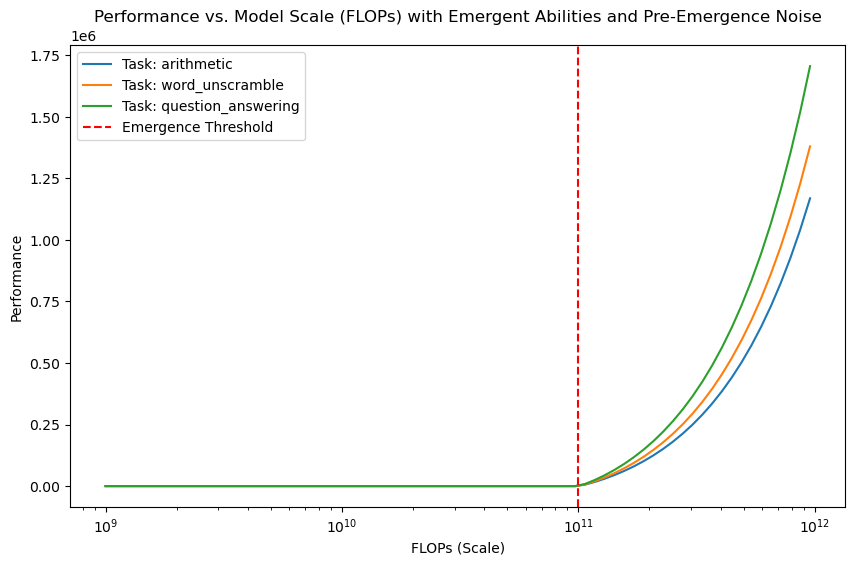

In [22]:
# Plot the performance curves for each task
plt.figure(figsize=(10, 6))
for task in tasks:
    plt.plot(flops_values, performance_data[task], label=f"Task: {task}")

# Mark the emergence threshold with a vertical line
plt.axvline(x=threshold_flops, color='r', linestyle='--', label='Emergence Threshold')
plt.xlabel('FLOPs (Scale)')
plt.ylabel('Performance')
plt.xscale('log')
plt.legend()
plt.title('Performance vs. Model Scale (FLOPs) with Emergent Abilities and Pre-Emergence Noise')
plt.show()